In [1]:
import tensorflow as tf
import keras

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
print (tf.__version__)

1.12.0


In [3]:
mnist = keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 64s 6us/step


In [4]:
print (x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [7]:
print(y_train[0])

5


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

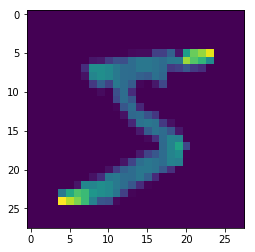

In [9]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

print(x_train[0])

plt.imshow(x_train[0])
plt.show()

In [10]:
model = keras.models.Sequential()

In [11]:
model.add(keras.layers.Flatten())

In [12]:
model.add(keras.layers.Dense(128, activation=tf.nn.relu))

In [13]:
model.add(keras.layers.Dense(128, activation=tf.nn.relu))

In [14]:
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 14s 227us/step - loss: 0.2586 - acc: 0.9235
Epoch 2/3
60000/60000 [==============================] - 10s 165us/step - loss: 0.1021 - acc: 0.9688
Epoch 3/3
60000/60000 [==============================] - 11s 182us/step - loss: 0.0698 - acc: 0.9774


In [17]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 1s 96us/step
0.096503991856426
0.9708


In [18]:
model.save('number.model')

In [19]:
new_model = keras.models.load_model('number.model')

In [20]:
predictions = new_model.predict(x_test)

In [21]:
print(predictions)

[[8.5178387e-10 5.9727951e-09 1.9630799e-07 ... 9.9999964e-01
  4.1342901e-10 2.5320042e-09]
 [3.1741973e-08 5.4051925e-05 9.9994564e-01 ... 1.0744024e-08
  3.9420279e-08 6.0159815e-11]
 [4.6235563e-08 9.9989355e-01 1.0455359e-05 ... 3.7359903e-05
  3.3078148e-05 8.8137756e-07]
 ...
 [5.6126959e-10 2.1495984e-08 1.9247637e-09 ... 1.5915870e-06
  1.7795908e-07 1.3967037e-05]
 [3.0323130e-05 2.3025869e-07 2.2636675e-07 ... 5.6752319e-06
  7.0148199e-05 5.8518268e-08]
 [2.9121650e-06 3.1322531e-10 6.2745130e-08 ... 2.1476694e-11
  6.6940133e-09 1.9553243e-09]]


In [22]:
import numpy as np

print(np.argmax(predictions[0]))

7


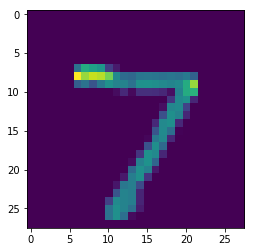

In [24]:
plt.imshow(x_test[0])
plt.show()